In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

SHAP (SHapley Additive exPlanations) is a game-theoretic approach that explains the output of any machine learning model. It connects optimal credit allocation with local explanations using Shapley values from game theory. In simple terms, SHAP tells you how much each feature contributes to the prediction of a model for a specific instance, or globally how important each feature is across the entire dataset. It helps in understanding the model's decision-making process.

In [ ]:
df = pd.read_csv( "/content/EV_2 (1).csv" )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101 entries, 0 to 1100
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EV      1101 non-null   float64
 1   AV      1101 non-null   float64
 2   OVX     1101 non-null   float64
 3   BTCE    1101 non-null   float64
 4   ARCA    1101 non-null   float64
 5   OIL     1101 non-null   float64
 6   NG      1101 non-null   float64
 7   ST      1101 non-null   float64
 8   REM     1101 non-null   float64
dtypes: float64(9)
memory usage: 77.5 KB


In [ ]:
c=df.dropna()
X_features = list( c.columns )
X_features.remove('EV')
X_features

['AV', 'OVX ', 'BTCE', 'ARCA', 'OIL', 'NG', 'ST', 'REM']

In [ ]:
encoded_df = pd.get_dummies( c[X_features], drop_first = True )
list(encoded_df.columns)

['AV', 'OVX ', 'BTCE', 'ARCA', 'OIL', 'NG', 'ST', 'REM']

In [ ]:
X=encoded_df
Y=c.EV
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import seaborn as sn
import matplotlib.pylab as plt
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state = 42)

In [ ]:
import shap
my_model = GradientBoostingRegressor().fit(X, Y)
#explainer = shap.TreeExplainer(my_model)

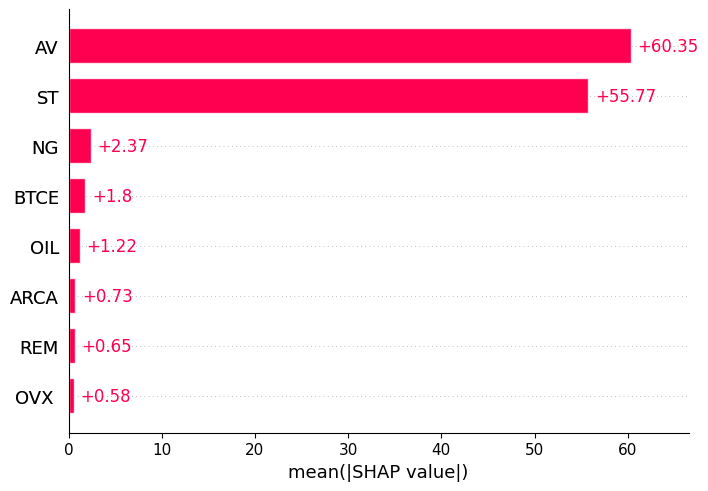

In [ ]:
explainer = shap.Explainer(my_model)
shap_values2 = explainer(X)
shap.plots.bar(shap_values2)

Generating summary plot...


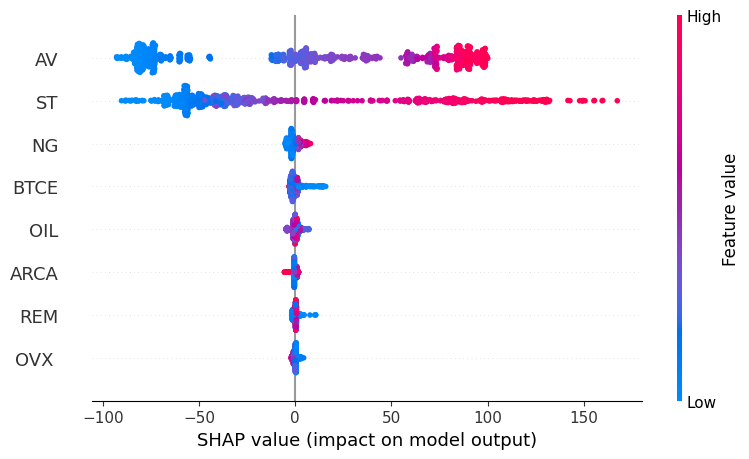

In [ ]:
# Summary plot
print("Generating summary plot...")
shap.summary_plot(shap_values2, X)

In [ ]:
!pip install PyALE # ALE- Accumulated local effort
# Identify impact of variables

In [ ]:
from PyALE import ale

In [ ]:
features = ["AV", "OVX", "BTCE", "ARCA", "OIL", "NG","ST", "REM"]

INFO:PyALE._ALE_generic:Continuous feature detected.


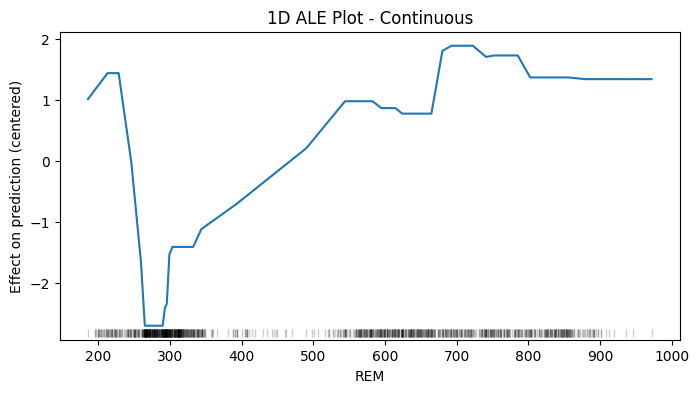

In [ ]:
features = ["AV", "OVX ", "BTCE", "ARCA", "OIL", "NG", "ST", "REM"]
ale_eff = ale(
    X=X[features], model=my_model, feature=["REM"], grid_size=50, include_CI=False
)

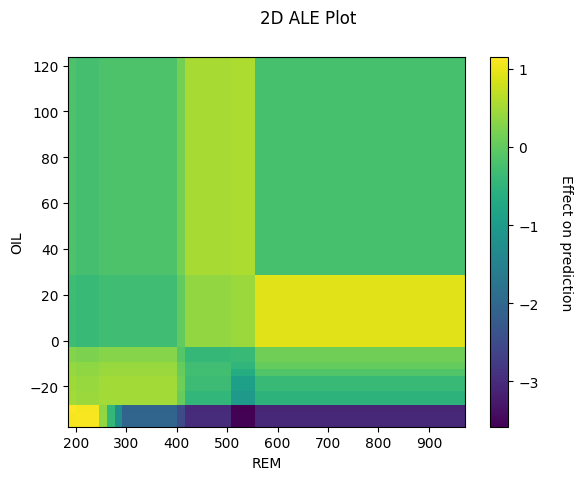

In [ ]:
ale_eff = ale(X=X[features], model=my_model, feature=["OIL","REM"], grid_size=50)

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=5b6423dec8f3e4706235896f1b0e854b693deb8a16c6faa56f6768fff385dfa6
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [ ]:
import lime
import lime.lime_tabular
dataset = pd.read_csv('/content/EV_2 (1).csv')
Y=dataset['EV']
X=dataset[['AV','OVX ','BTCE', 'ARCA', 'OIL', 'NG', 'ST', 'REM']]
X_featurenames=X.columns

In [ ]:
model = GradientBoostingRegressor().fit(X, Y)

Intercept 345.13933028013867
Prediction_local [158.23459035]
Right: 131.6295730677084


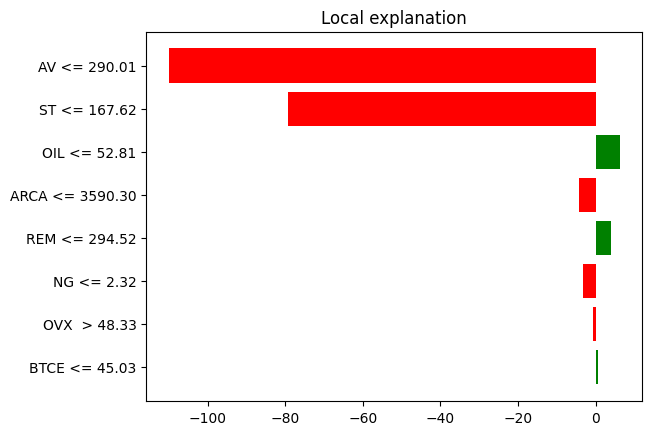

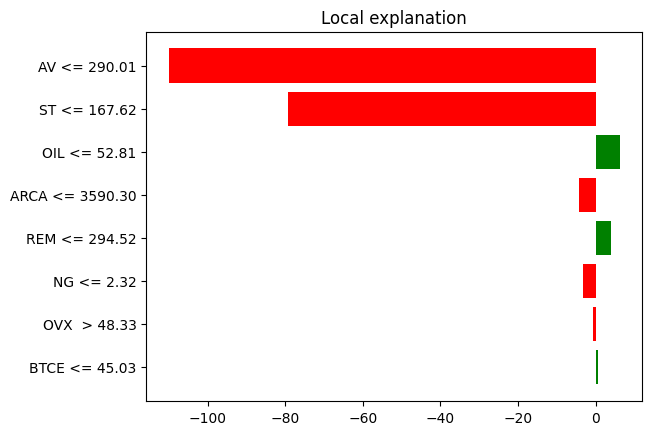

In [ ]:
explainer=lime.lime_tabular.LimeTabularExplainer(np.array(X),feature_names=X_featurenames, class_names=['Regression'],verbose=True,mode='regression')
exp=explainer.explain_instance(X.iloc[319],model.predict,num_features=20)
exp.as_pyplot_figure() #Feature contribution pattern

In [ ]:
best_model = clf.best_estimator_

# Predictions on Training Data
Y_train_pred = best_model.predict(X_train)
print("\n--- Training Data Evaluation ---")
print(f"R-squared (Train): {metrics.r2_score(Y_train, Y_train_pred):.3f}")
print(f"Mean Absolute Error (MAE) (Train): {metrics.mean_absolute_error(Y_train, Y_train_pred):.3f}")
print(f"Mean Squared Error (MSE) (Train): {metrics.mean_squared_error(Y_train, Y_train_pred):.3f}")
print(f"Root Mean Squared Error (RMSE) (Train): {np.sqrt(metrics.mean_squared_error(Y_train, Y_train_pred)):.3f}")

# Predictions on Test Data
Y_test_pred = best_model.predict(X_test)
print("\n--- Test Data Evaluation ---")
print(f"R-squared (Test): {metrics.r2_score(Y_test, Y_test_pred):.3f}")
print(f"Mean Absolute Error (MAE) (Test): {metrics.mean_absolute_error(Y_test, Y_test_pred):.3f}")
print(f"Mean Squared Error (MSE) (Test): {metrics.mean_squared_error(Y_test, Y_test_pred):.3f}")
print(f"Root Mean Squared Error (RMSE) (Test): {np.sqrt(metrics.mean_squared_error(Y_test, Y_test_pred)):.3f}")


--- Training Data Evaluation ---
R-squared (Train): 1.000
Mean Absolute Error (MAE) (Train): 0.223
Mean Squared Error (MSE) (Train): 0.080
Root Mean Squared Error (RMSE) (Train): 0.283

--- Test Data Evaluation ---
R-squared (Test): 0.999
Mean Absolute Error (MAE) (Test): 3.401
Mean Squared Error (MSE) (Test): 23.662
Root Mean Squared Error (RMSE) (Test): 4.864


In [ ]:
parameters1={
    "learning_rate":[0.025,0.05, 0.075],
    "n_estimators":[100, 200, 500],
    "max_features":[1,2,3,'auto'],
    "max_depth":[3,5]
    }
clf = GridSearchCV(GradientBoostingRegressor(), parameters1, cv=10, n_jobs=-1)
clf.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.025, 0.05, 0.075],
                         'max_depth': [3, 5], 'max_features': [1, 2, 3, 'auto'],
                         'n_estimators': [100, 200, 500]})